In [1]:
import sys
sys.path.append('../utils')
from nd_tools import scale_img

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.cluster import KMeans


The goals of this notebook is to:

1. Introduce coherence images
2. Use coherence images for classification

# Inspecting Data

In [2]:
data_dir = Path('../data')
coh_tifs = sorted(list(data_dir.glob('./*coh*.tif')))
coh_tifs

[PosixPath('../data/alos_coh_hh.tif'), PosixPath('../data/alos_coh_hv.tif')]

In [3]:
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)
    return band

coherence_bands = list(map(open_one, coh_tifs))

Text(0.5, 1.0, 'HV')

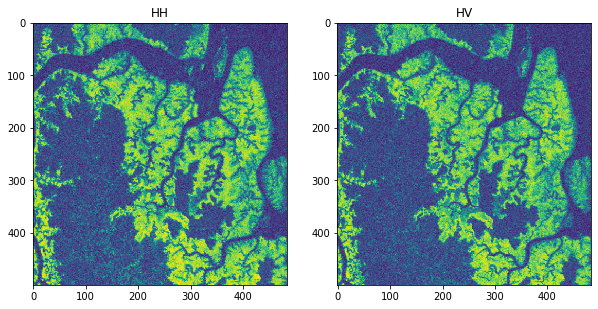

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(coherence_bands[0])
ax[0].set_title('HH')
im = ax[1].imshow(coherence_bands[1])
ax[1].set_title('HV')

Coherence is a measure of [complex correlation](https://earth.esa.int/handbooks/asar/CNTR5-2.html#eph.asar.gloss.radsar:COHERENCE) within a given window. Above, the coherence images are from [ALOS-2](https://www.eorc.jaxa.jp/ALOS/en/index.htm) and processed using the open-source [ISCE2](https://github.com/isce-framework/isce2). A nice tutorial on how to obtain coherence images from ALOS with ISCE can be found [here](https://github.com/isce-framework/isce2-docs/blob/b3c618e57a3b349b8d2f143e96547edc0864e936/Notebooks/Stripmap/stripmapApp.ipynb).

We see indeed the correlation lies between 0 and 1.

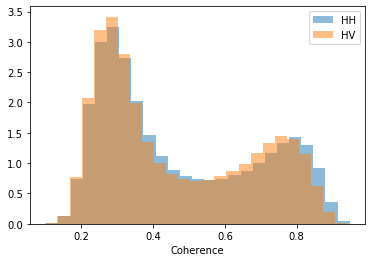

In [5]:
plt.hist(coherence_bands[0].ravel(),
         bins=25,
         density=True,
         label='HH',
         alpha=.5)
plt.hist(coherence_bands[1].ravel(),
         bins=25,
         density=True,
         label='HV',
         alpha=.5)
plt.xlabel('Coherence')
plt.legend()

Let's see what happens when we classify the coherence image with k-means.

In [6]:
model = KMeans(n_clusters=3, 
               random_state=0)
X_train = np.zeros((coherence_bands[0].size, 2))
X_train[:, 0] = coherence_bands[0].ravel()
X_train[:, 1] = coherence_bands[1].ravel()
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

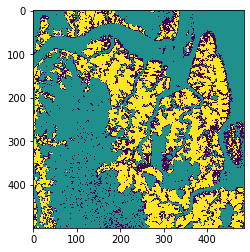

In [7]:
classes = model.labels_.reshape(coherence_bands[0].shape)
plt.imshow(classes)

Clearly the forest and ocean are conflated. Let's add backscatter to the classification.

# Combining Coherence and Backscatter for Classification

In [8]:
data_dir = Path('../data')
tv_tifs = sorted(list(data_dir.glob('./*tv.tif')))
tv_tifs

[PosixPath('../data/alos_hh_tv.tif'), PosixPath('../data/alos_hv_tv.tif')]

In [9]:
backscatter_bands = list(map(open_one, tv_tifs))

In [10]:
model = KMeans(n_clusters=3, 
               random_state=0)
X_train = np.zeros((coherence_bands[0].size, 4))
X_train[:, 0] = coherence_bands[0].ravel()
X_train[:, 1] = coherence_bands[1].ravel()
X_train[:, 2] = backscatter_bands[0].ravel()
X_train[:, 3] = backscatter_bands[1].ravel()
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

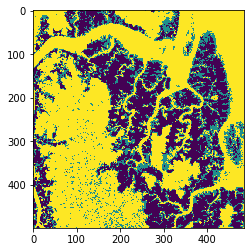

In [11]:
classes = model.labels_.reshape(backscatter_bands[0].shape)
plt.imshow(classes)

# Excercise 1

Improve the classification by scaling each band to be between 0 and 1. Why does this help? Where are the problem points? Try using 4 classes, too.

Save to GTiff and inspect.

In [12]:
## Answer

In [13]:
## Answer

In [14]:
## Answer

In [15]:
## Answer

# Acknowledgements

We gratefully and humbly acknowledge JAXA for the use of ALOS-2 data to generate a coherence image over Mondah, Gabon generated using ISCE2.

We are grateful to the ASF for providing easy access to ALOS-1 radiometrically and terrain corrected tiles over Mondah and Ko Panyi.

A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.